# Lektion 7

In [1]:
from sympy import *
init_printing()
import numpy as np
import matplotlib.pyplot as plt

interaktiv

In [ ]:
%matplotlib notebook

für den Druck

In [2]:
%matplotlib inline 

## Integration

In [3]:
x = Symbol('x')

In [4]:
f = sin(x)/x

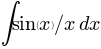

In [5]:
I1 = Integral(f, x)
I1

In [7]:
I1.doit()

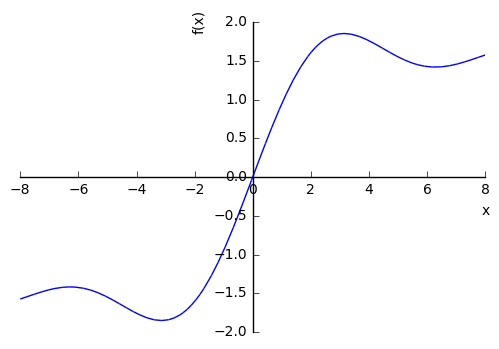

In [8]:
plot(Si(x), (x, -8, 8));

In [9]:
Si(6.)

In [10]:
Integral(sin(x)/x, (x,0,6)).n()

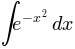

In [11]:
I3 = Integral(exp(-x**2), x)
I3

In [12]:
I3.doit()

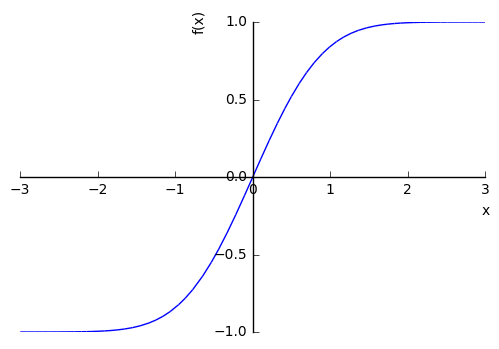

In [13]:
plot(erf(x), (x, -3, 3));

In [14]:
f = (1-x**2)**Rational(-3,2)

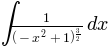

In [15]:
I4 = Integral(f, x)
I4

In [16]:
tmp = I4.doit()
tmp

⎧      1             │1 │    
⎪──────────────  for │──│ > 1
⎪     _________      │ 2│    
⎪    ╱      1        │x │    
⎪   ╱  -1 + ──               
⎪  ╱         2               
⎪╲╱         x                
⎨                            
⎪     -ⅈ                     
⎪─────────────    otherwise  
⎪     ________               
⎪    ╱     1                 
⎪   ╱  1 - ──                
⎪  ╱        2                
⎩╲╱        x                 

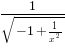

In [17]:
F = tmp.args[0][0]
F

In [18]:
F.diff(x) == f

False

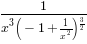

In [19]:
F.diff(x)

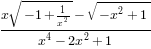

In [23]:
(F.diff(x) - f).radsimp().expand().ratsimp()

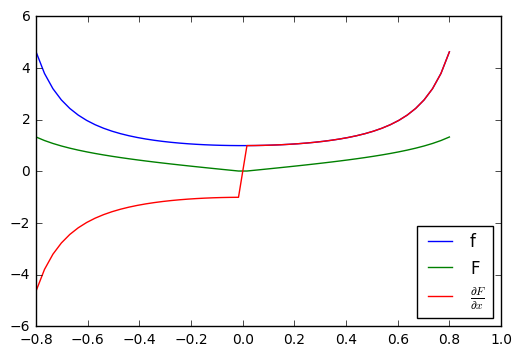

In [24]:
xn = np.linspace(-.8, .8)
fn = lambdify(x, f)
Fn = lambdify(x, F, 'numpy')
dFn = lambdify(x, F.diff(x), 'numpy')
plt.plot(xn, fn(xn), label='f')
plt.plot(xn, Fn(xn), label='F')
plt.plot(xn, dFn(xn), label='$\\frac{\\partial F}{\\partial x}$')
plt.legend(loc='lower right');

Die Stammfunktion ist falsch.  Wir waren aber gewarnt.

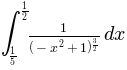

In [25]:
I5 = Integral(f, (x, Rational(1,5), Rational(1,2)))
I5

In [26]:
I5.doit()  # AttribureError

AttributeError: 'Or' object has no attribute 'lts'

In [27]:
y = Symbol('y', real=True)

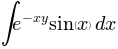

In [28]:
g = sin(x) * exp(-x*y)
I6 = Integral(g, x)
I6

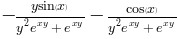

In [29]:
G = I6.doit()
G

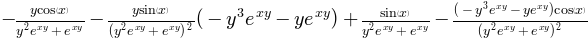

In [31]:
G.diff(x)# == g

In [32]:
G.diff(x).simplify() == g

True

## Das Taylorpolynom

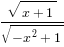

In [33]:
x = Symbol('x')
f = sqrt(1+x)/sqrt(1-x**2)
f

In [34]:
t = f.series(x, 0, 8)
t

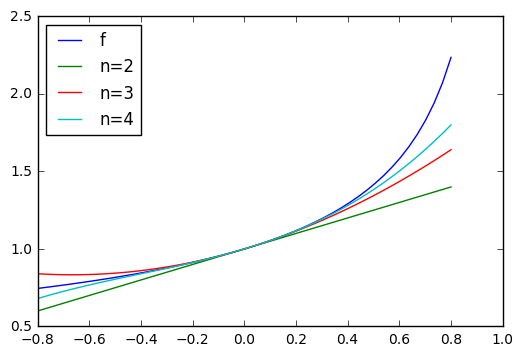

In [35]:
xn = np.linspace(-.8, .8)
fn = lambdify(x, f, 'numpy')
plt.plot(xn, fn(xn), label='f')
for n in range(2, 5):   # n=1 führt auf ValueError
    tt = t + O(x**n, (x,0))
    tn = lambdify(x, tt.removeO(), 'numpy')
    plt.plot(xn, tn(xn), label='n='+str(n))
plt.legend(loc='upper left');

Dasselbe für den Arcustangens

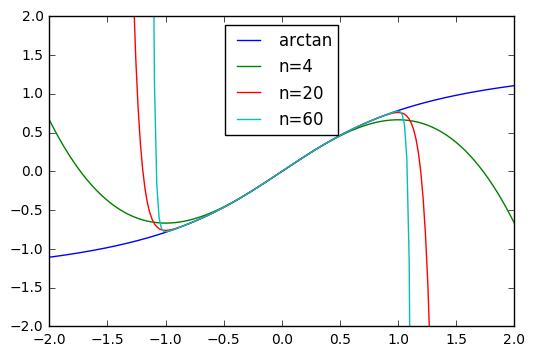

In [36]:
xn = np.linspace(-2, 2, 200)
plt.plot(xn, np.arctan(xn), label='arctan')
for n in [4, 20, 60]:
    t = atan(x).series(x, 0, n)
    tn = lambdify(x, t.removeO(), 'numpy')
    plt.plot(xn, tn(xn), label='n='+str(n))
plt.axis(ymin=-2, ymax=2)
plt.legend(loc='upper center');

## Allgemeinere Reihenentwicklungen

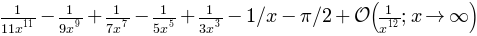

In [45]:
t = {}
t[1] = atan(x).series(x, -oo, 12)
t[1]

In [47]:
t[2] = atan(x).series(x, 0, 12)
t[2]

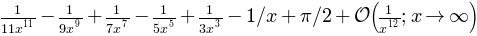

In [48]:
t[3] = atan(x).series(x, oo, 12)
t[3]

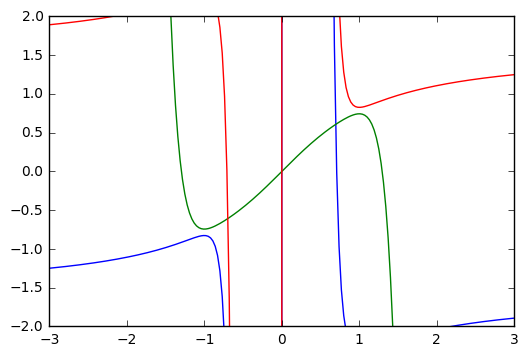

In [49]:
xn = np.linspace(-3, 3, 200)
for nr, tt in t.items():
    tn = lambdify(x, tt.removeO())
    plt.plot(xn, tn(xn))
plt.axis(ymin=-2, ymax=2);

## Grenzwertbestimmung mittels Reihenentwicklung

In [50]:
x = Symbol('x')

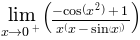

In [51]:
f = 1 - cos(x**2)
g = x*(x-sin(x))
L = Limit(f/g, x, 0)
L

In [52]:
L.doit()

In [53]:
fr = f.series(x, 0, 10)
fr

In [54]:
gr = g.series(x, 0, 10)
gr

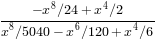

In [55]:
t1 = fr.removeO() / gr.removeO()
t1

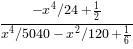

In [56]:
n, z = numer(t1), denom(t1)
t2 = (n/x**4).expand() / (z/x**4).expand()
t2

In [57]:
t2.subs(x, 0)

## Vektoren und Matrizen

In [58]:
x = Matrix([1,2,3])
x

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

In [59]:
y = Matrix(1,3,[4,5,6])
y

[4  5  6]

In [60]:
y*x

[32]

In [61]:
x*y

⎡4   5   6 ⎤
⎢          ⎥
⎢8   10  12⎥
⎢          ⎥
⎣12  15  18⎦

In [62]:
A = Matrix(3,3,range(1,10))
A

⎡1  2  3⎤
⎢       ⎥
⎢4  5  6⎥
⎢       ⎥
⎣7  8  9⎦

In [63]:
A[1,1]

In [64]:
A*x

⎡14⎤
⎢  ⎥
⎢32⎥
⎢  ⎥
⎣50⎦

In [65]:
A*y  # ShapeError

ShapeError: Matrices size mismatch.

In [66]:
y*A

[66  81  96]

In [67]:
B = Matrix(3,3,[1,0,1,-1,-1,-1,0,1,0])
B

⎡1   0   1 ⎤
⎢          ⎥
⎢-1  -1  -1⎥
⎢          ⎥
⎣0   1   0 ⎦

In [68]:
A * B

⎡-1  1  -1⎤
⎢         ⎥
⎢-1  1  -1⎥
⎢         ⎥
⎣-1  1  -1⎦

In [70]:
np.array(A) * np.array(B)

array([[1, 0, 3],
       [-4, -5, -6],
       [0, 8, 0]], dtype=object)

In [71]:
A*B -B*A

⎡-9  -9  -13⎤
⎢           ⎥
⎢11  16  17 ⎥
⎢           ⎥
⎣-5  -4  -7 ⎦

In [72]:
eye(5)

⎡1  0  0  0  0⎤
⎢             ⎥
⎢0  1  0  0  0⎥
⎢             ⎥
⎢0  0  1  0  0⎥
⎢             ⎥
⎢0  0  0  1  0⎥
⎢             ⎥
⎣0  0  0  0  1⎦

In [74]:
C = A + eye(3)

In [75]:
A.det()

In [76]:
C.det()

In [77]:
C**(-1)

⎡-6  -2   3 ⎤
⎢           ⎥
⎢-1  1/2  0 ⎥
⎢           ⎥
⎣5    1   -2⎦

In [78]:
C*C**(-1)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [79]:
C**(-1)*C

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [80]:
A.T  # Transponierte

⎡1  4  7⎤
⎢       ⎥
⎢2  5  8⎥
⎢       ⎥
⎣3  6  9⎦

## Manipulation von Matrizen

In [81]:
Matrix([A,B])

⎡1   2   3 ⎤
⎢          ⎥
⎢4   5   6 ⎥
⎢          ⎥
⎢7   8   9 ⎥
⎢          ⎥
⎢1   0   1 ⎥
⎢          ⎥
⎢-1  -1  -1⎥
⎢          ⎥
⎣0   1   0 ⎦

In [82]:
Matrix([A.T, B.T]).T

⎡1  2  3  1   0   1 ⎤
⎢                   ⎥
⎢4  5  6  -1  -1  -1⎥
⎢                   ⎥
⎣7  8  9  0   1   0 ⎦

In [85]:
A.reshape(1, len(A))#.reshape(3,3)   # flatten a matrix

[1  2  3  4  5  6  7  8  9]

In [86]:
A

⎡1  2  3⎤
⎢       ⎥
⎢4  5  6⎥
⎢       ⎥
⎣7  8  9⎦

In [87]:
A[0:2, 1:3]

⎡2  3⎤
⎢    ⎥
⎣5  6⎦

In [88]:
A[[0,2], [0,2]]

⎡1  3⎤
⎢    ⎥
⎣7  9⎦

## Matrix aus Bildungsvorschrift

In [89]:
def element(i,j):
    return 1 + 3*i + j

In [90]:
E = Matrix(3,3, element)
E

⎡1  2  3⎤
⎢       ⎥
⎢4  5  6⎥
⎢       ⎥
⎣7  8  9⎦

In [91]:
def hilbert_element(i,j):
    return 1/(i+j+1)

In [92]:
hilbert = Matrix(5,5,hilbert_element)
hilbert

⎡ 1   1/2  1/3  1/4  1/5⎤
⎢                       ⎥
⎢1/2  1/3  1/4  1/5  1/6⎥
⎢                       ⎥
⎢1/3  1/4  1/5  1/6  1/7⎥
⎢                       ⎥
⎢1/4  1/5  1/6  1/7  1/8⎥
⎢                       ⎥
⎣1/5  1/6  1/7  1/8  1/9⎦

In [93]:
hilbert.det()

In [94]:
hilbert**(-1)

⎡ 25     -300    1050     -1400    630  ⎤
⎢                                       ⎥
⎢-300    4800   -18900    26880   -12600⎥
⎢                                       ⎥
⎢1050   -18900   79380   -117600  56700 ⎥
⎢                                       ⎥
⎢-1400  26880   -117600  179200   -88200⎥
⎢                                       ⎥
⎣ 630   -12600   56700   -88200   44100 ⎦

In [95]:
hilbert = Matrix(60, 60, hilbert_element)

In [96]:
inv_hilbert = hilbert**(-1)

In [97]:
inv_hilbert[29,40]

In [98]:
def f_hilbert_element(i,j):
    return float(hilbert_element(i,j))

f_hilbert = Matrix(60, 60, f_hilbert_element)

In [99]:
inv_f_hilbert = f_hilbert**(-1)

In [100]:
inv_f_hilbert[29,40]

In [101]:
float(inv_hilbert[29,40])

In [102]:
float(hilbert.det())

In [103]:
hd = hilbert.det()
hd

In [104]:
mpmath.mpf(hd)

mpf('6.9158407880274928e-2121')